–°–æ–∑–¥–∞–Ω–æ –ø–æ–¥ —Ä—É–∫–æ–≤–æ–¥—Å—Ç–≤–æ–º [—Å—Ç–∞—Ç—å–∏](https://docs.pymc.io/notebooks/probabilistic_matrix_factorization.html) –∏–∑ –ø—Ä–∏–º–µ—Ä–æ–≤ PyMC3.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
from IPython.display import clear_output
!pip install pymc3==3.9
import pymc3 as pm
if pm.__version__ == '3.9.0':
    clear_output()
    print('Ready to Bayes!')

Ready to Bayes!


# –ó–∞–¥–∞—á–∞

–û–±–æ–∑–Ω–∞—á–µ–Ω–∏—è:

$M$ - —á–∏—Å–ª–æ —Ñ–∏–ª—å–º–æ–≤ (items)

$N$ - —á–∏—Å–ª–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π (users)

$D$ - —á–∏—Å–ª–æ —Å–∫—Ä—ã—Ç—ã—Ö (latent) –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –æ–ø–∏—Å—ã–≤–∞—é—â–∏—Ö –∫–∞–∂–¥—ã–π —Ñ–∏–ª—å–º

–ú–∞—Ç—Ä–∏—Ü—ã:

$U$ - –º–∞—Ç—Ä–∏—Ü–∞ $N \times D$ —Å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤—ã–º –æ–ø–∏—Å–∞–Ω–∏–µ–º –∫–∞–∂–¥–æ–≥–æ —Ñ–∏–ª—å–º–∞ (–µ–µ —Å—Ç—Ä–æ–∫–∞ - –ø—Ä–∏–∑–Ω–∞–∫–æ–≤–æ–µ –æ–ø–∏—Å–∞–Ω–∏–µ –æ—Ç–¥–µ–ª—å–Ω–æ–≥–æ —Ñ–∏–ª—å–º–∞)

$V$ - –º–∞—Ç—Ä–∏—Ü–∞ $M \times D$ —Å –æ–ø–∏—Å–∞–Ω–∏–µ–º –ø—Ä–µ–¥–ø–æ—á—Ç–µ–Ω–∏–π –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π (—Å—Ç—Ä–æ–∫–∞ - –∫–∞–∫ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å –ª—é–±–∏—Ç –∫–∞–∂–¥—É—é –∏–∑ —Å–∫—Ä—ã—Ç—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö)

$R$ (ratings) - –º–∞—Ç—Ä–∏—Ü–∞ $N \times M$, –≥–¥–µ $R_{ij}$ - –∫–∞–∫ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å $i$ –ª—é–±–∏—Ç —Ñ–∏–ª—å–º $j$

–ú—ã –Ω–∞–±–ª—é–¥–∞–µ–º –º–∞—Ç—Ä–∏—Ü—É $R$, –ø—Ä–∏—á–µ–º –Ω–µ —Ü–µ–ª–∏–∫–æ–º (–Ω–µ –≤—Å–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –ø–æ—Å—Ç–∞–≤–∏–ª–∏ —Å–≤–æ–∏ —Ä–µ–π—Ç–∏–Ω–≥–∏).$R_{ij}=U_i*V_j$ - —Å–∫–∞–ª—è—Ä–Ω–æ–µ –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∏–µ.

–ó–∞–¥–∞—á–∞ - –æ—Ü–µ–Ω–∏—Ç—å –º–∞—Ç—Ä–∏—Ü—É $R=UV^T$. –û–±–æ–∑–Ω–∞—á–∏–º –µ–µ –æ—Ü–µ–Ω–∫—É –∫–∞–∫ $R^*$.

# –î–∞–Ω–Ω—ã–µ

In [ ]:
# user rating data
data = pd.read_csv(pm.get_data("ml_100k_u.data"), sep='\t',
                   names=["userid", "itemid", "rating", "timestamp"])
data.head()

userid  itemid  rating  timestamp
0     196     242       3  881250949
1     186     302       3  891717742
2      22     377       1  878887116
3     244      51       2  880606923
4     166     346       1  886397596

In [ ]:
movie_columns  = ['movie id', 'movie title', 'release date', 'video release date', 'IMDb URL',
                  'unknown','Action','Adventure', 'Animation',"Children's", 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
                  'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

movies = pd.read_csv(
    pm.get_data("ml_100k_u.item"),
    sep="|",
    names=movie_columns,
    index_col="movie id",
    parse_dates=["release date"],
)
movies.head()

movie title release date  ...  War Western
movie id                                  ...             
1          Toy Story (1995)   1995-01-01  ...    0       0
2          GoldenEye (1995)   1995-01-01  ...    0       0
3         Four Rooms (1995)   1995-01-01  ...    0       0
4         Get Shorty (1995)   1995-01-01  ...    0       0
5            Copycat (1995)   1995-01-01  ...    0       0

[5 rows x 23 columns]

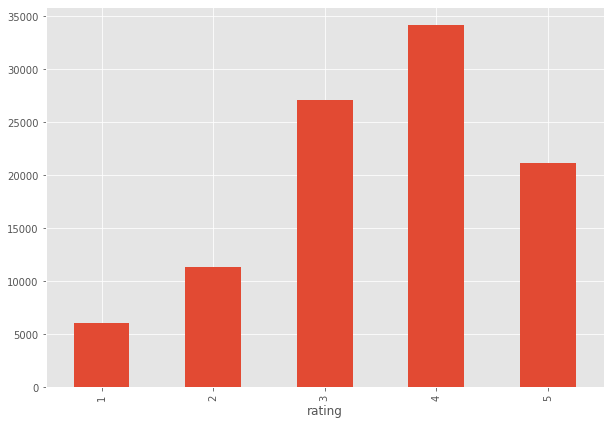

In [ ]:
ratings = data.rating
data.groupby('rating').size().plot(kind='bar', figsize=[10, 7]);

In [ ]:
data.rating.describe()

count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

–¢–µ–ø–µ—Ä—å –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Å—Ä–µ–¥–Ω–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –ø–æ —Ñ–∏–ª—å–º–∞–º:

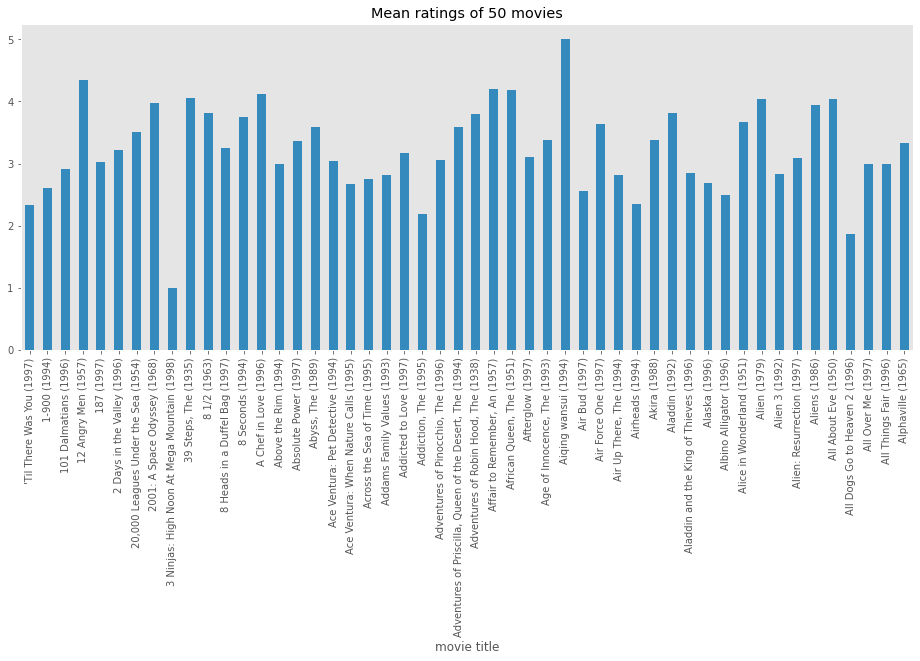

In [ ]:
movie_means = data.join(movies['movie title'], on='itemid').groupby('movie title').rating.mean()
movie_means[:50].plot(
    kind='bar',
    figsize = (16, 6),
    grid=False,
    title='Mean ratings of 50 movies',
    color='C1'
    );

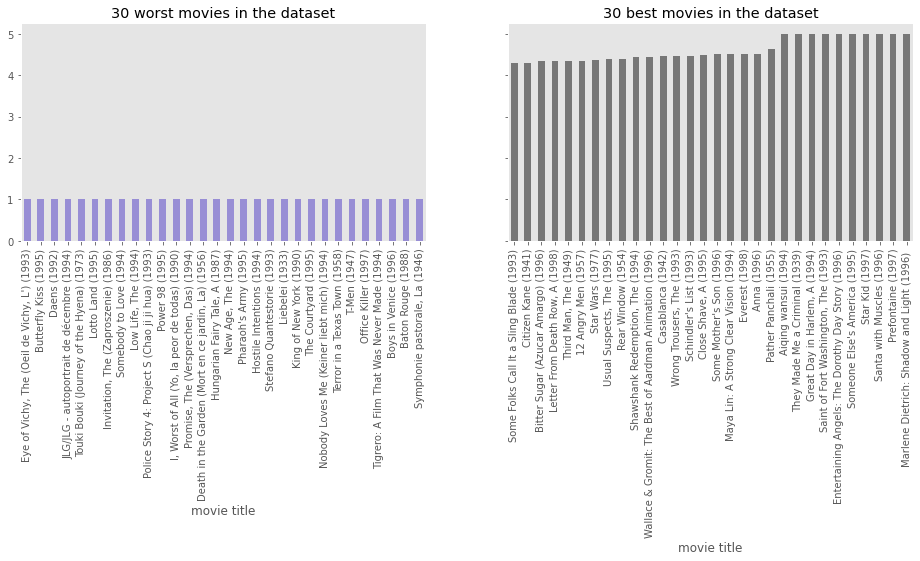

In [ ]:
# —É –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–∞ - —Å—Ä–µ–¥–Ω–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∏, –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ö—É–¥—à–∏–µ –∏ –ª—É—á—à–∏–µ —Ñ–∏–ª—å–º—ã
fig, ax = plt.subplots(1, 2, figsize=[16, 4], sharey=True)
kwargs = {
    'kind' : 'bar',
    'grid' : False,
}
movie_means.sort_values()[:30].plot(ax=ax[0],
                                    title='30 worst movies in the dataset',
                                    color='C2',
                                    **kwargs)
movie_means.sort_values()[-30:].plot(ax=ax[1],
                                     title='30 best movies in the dataset',
                                     color='C3',
                                     **kwargs);

In [ ]:
# –∏—Ç–∞–∫, –µ—Å—Ç—å —Ä–∞–∑–Ω–∏—Ü–∞ –ø–æ –æ—Ü–µ–Ω–∫–∞–º —Å—Ä–µ–¥–∏ —Ñ–∏–ª—å–º–æ–≤, –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞–∑–Ω–∏—Ü—É —Å—Ä–µ–¥–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π
mean_ascending = data.groupby('userid').mean()['rating'].sort_values()
t = np.arange(len(mean_ascending)) + 1

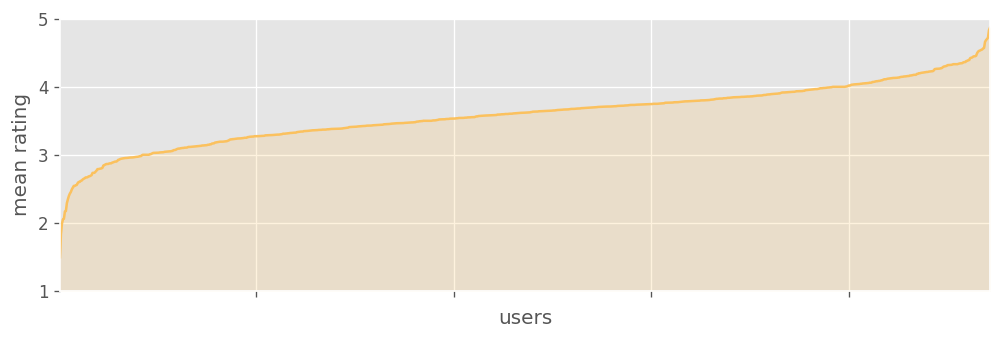

In [ ]:
fig, ax = plt.subplots(figsize=[10, 3], dpi=120)

ax.plot(t, mean_ascending, color='C4')
ax.fill_between(t, mean_ascending, alpha=0.2,  color='C4')
ax.set(xlabel='users', ylabel='mean rating', xlim=(1, 943), ylim=(1, 5),
       xticklabels='', yticks=np.arange(1, 6));

# –ú–µ—Ç–æ–¥—ã

# Baselines

In [ ]:
# –Ω–µ–±–æ–ª—å—à–æ–π –∫–æ—Å—Ç—ã–ª—å –≤ –º–µ—Ç–æ—Ç __str__
def split_title(title):
    """Change "BaselineMethod" to "Baseline Method"."""
    words = []
    tmp = [title[0]]
    for c in title[1:]:
        if c.isupper():
            words.append(''.join(tmp))
            tmp = [c]
        else:
            tmp.append(c)
    words.append(''.join(tmp))
    return ' '.join(words)

split_title('HelloHowAreYou')

'Hello How Are You'

In [ ]:
# —Å–ø–∞—Å–∏–±–æ, 3 –∫–ª–∞—Å—Å –∏–∞–¥–∞, —á—Ç–æ —Ç–µ–ø–µ—Ä—å —è –Ω–µ –±–æ—é—Å—å –∫–ª–∞—Å—Å–æ–≤
# –ø–æ–ø—Ä–æ–±—É–π –ø–æ—Ç–æ–º str(...)
class Baseline:
    "Calculate baseline predictions."

    def __init__(self, train_data):
        """Simple heuristic-based transductive learning to fill in missing
        values in data matrix."""
        self.predict(train_data.copy())

    def predict(self, train_data):
        raise NotImplementedError("baseline prediction not implemented for base class")

    def rmse(self, test_data):
        return rmse(test_data, self.predicted)

    def __str__(self):
        return split_title(self.__class__.__name__)

–î–∞–ª—å—à–µ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç –Ω–µ–±–æ–ª—å—à–∞—è –º–∞–≥–∏—è —Å masked arrays, —Å–Ω–∏–∑—É –ø—Ä–æ—Å—Ç–æ–π –ø—Ä–∏–º–µ—Ä:
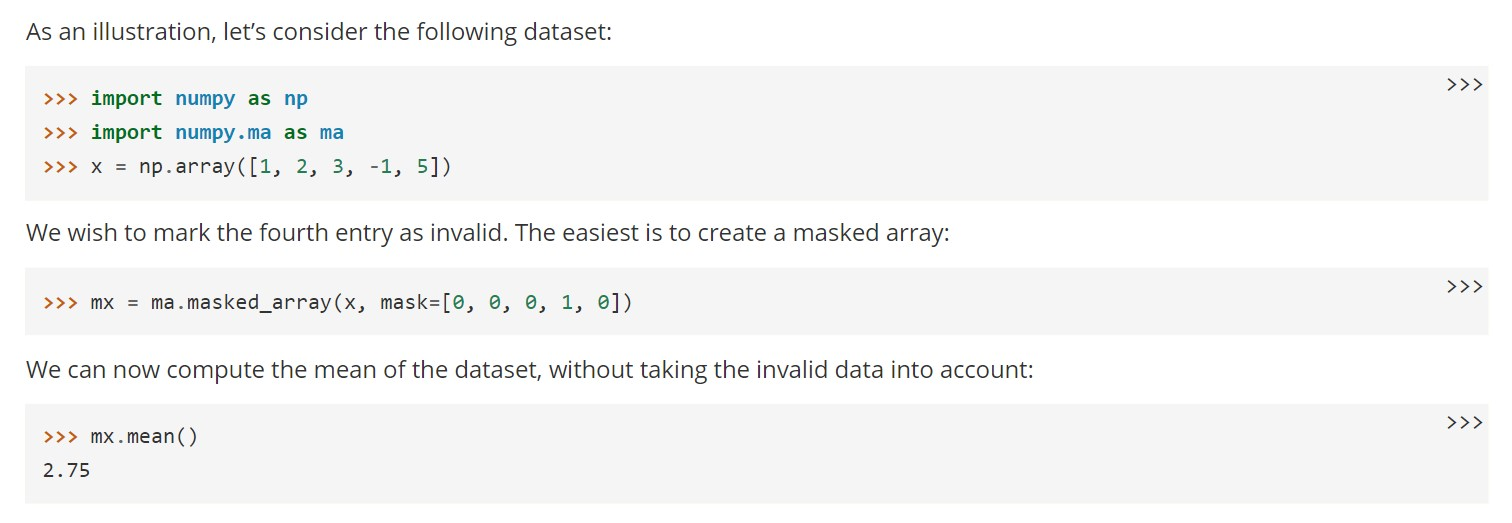

In [ ]:
class UniformRandomBaseline(Baseline):
    """–ó–∞–±–∏–≤–∞–µ–º –ø—Ä–æ–ø—É—Å–∫–∏ —Ä–∞–Ω–¥–æ–º–æ–º"""

    def predict(self, train_data):
        nan_mask = np.isnan(train_data)
        masked_train = np.ma.masked_array(train_data, nan_mask)
        pmin, pmax = masked_train.min(), masked_train.max()
        N = nan_mask.sum()  # —Å–∫–æ–ª—å–∫–æ –≤—Å–µ–≥–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
        train_data[nan_mask] = np.random.uniform(pmin, pmax, N)
        self.predicted = train_data

In [ ]:
class GlobalMeanBaseline(Baseline):
    """–ó–∞–±–∏–≤–∞–µ–º –ø—Ä–æ–ø—É—Å–∫–∏ —Å—Ä–µ–¥–Ω–∏–º –ø–æ –≤—Å–µ–º —Ä–µ–π—Ç–∏–Ω–≥–∞–º"""

    def predict(self, train_data):
        nan_mask = np.isnan(train_data)
        train_data[nan_mask] = train_data[~nan_mask].mean()
        self.predicted = train_data

In [ ]:
class MeanOfMeansBaseline(Baseline):
    """ 1/3 (—Å—Ä–µ–¥–Ω–∏–π —Ä–µ–π—Ç–∏–Ω–≥ —Ñ–∏–ª—å–º–∞ + —Å—Ä–µ–¥–Ω–∏–π —Ä–µ–π—Ç–∏–Ω–≥ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è + –≥–ª–æ–±–∞–ª—å–Ω—ã–π —Å—Ä–µ–¥–Ω–∏–π —Ä–µ–π—Ç–∏–Ω–≥)"""

    def predict(self, train_data):
        nan_mask = np.isnan(train_data)
        masked_train = np.ma.masked_array(train_data, nan_mask)
        movie_means = masked_train.mean(0)
        user_means = masked_train.mean(1).reshape(-1, 1)
        global_mean = masked_train.mean()
        mean_substitutes = (movie_means + user_means + global_mean) / 3
        self.predicted = np.nan_to_num(train_data, copy=True, nan=0) + mean_substitutes * nan_mask

In [ ]:
UniformRandomBaseline?

In [ ]:
baseline_methods = {}
baseline_methods["ur"] = UniformRandomBaseline
baseline_methods["gm"] = GlobalMeanBaseline
baseline_methods["mom"] = MeanOfMeansBaseline

–ú–∞—Ç—Ä–∏—Ü–∞ $R$ (c –ø—Ä–æ–ø—É—Å–∫–∞–º–∏, –ø–æ—Ç–æ–º—É —á—Ç–æ –Ω–µ –∫–∞–∂–¥—ã–π –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å –æ—Ü–µ–Ω–∏–ª –∫–∞–∂–¥—ã–π —Ñ–∏–ª—å–º):

In [ ]:
dense_data = data.pivot(index="userid", columns="itemid", values="rating")

In [ ]:
dense_data

itemid  1     2     3     4     5     6     ...  1677  1678  1679  1680  1681  1682
userid                                      ...                                    
1        5.0   3.0   4.0   3.0   3.0   5.0  ...   NaN   NaN   NaN   NaN   NaN   NaN
2        4.0   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
3        NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
4        NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
5        4.0   3.0   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
...      ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
939      NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
940      NaN   NaN   NaN   2.0   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
941      5.0   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
942      NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
943      NaN   5.0   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN

[943 rows x 1682 columns]

In [ ]:
dense_data = dense_data.values

## Probabilistic matrix factorization

–ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, —á—Ç–æ —ç–ª–µ–º–µ–Ω—Ç—ã –º–∞—Ç—Ä–∏—Ü $V$, $U$ –∏–º–µ—é—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å –Ω—É–ª–µ–≤—ã–º —Å—Ä–µ–¥–Ω–∏–º –∏ *—Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ–π* –¥–∏—Å–ø–µ—Ä—Å–∏–µ–π, –∫–æ—Ç–æ—Ä—É—é –º—ã –æ—Ü–µ–Ω–∏–º –∫–∞–∫ —Å—Ä–µ–¥–Ω–∏–π —Ä–∞–∑–±—Ä–æ—Å –ø–æ —Å—Ç—Ä–æ–∫–∞–º –∏ —Å—Ç–æ–ª–±—Ü–∞–º (–≤–æ–∑–º–æ–∂–Ω–æ, –Ω–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æüòÇ).

–ó–∞—Ç–µ–º –ø–æ–ª—É—á–∏–º –æ—Ü–µ–Ω–∫—É $R^*=\mathcal{N}(UV^T, \alpha)$, –≥–¥–µ $\alpha$ - —Ç–∞–∫–∂–µ —Ñ–∏–∫—Å–∏—Ä–≤–∞–Ω–Ω—ã–π –ø–∞—Ä–∞–º–µ—Ç—Ä (–≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä), –∫–æ—Ç–æ—Ä—ã–π –æ—Ç–æ–±—Ä–∞–∂–∞–µ—Ç —Å—Ç–µ–ø–µ–Ω—å –Ω–∞—à–µ–π –Ω–µ–æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ—Å—Ç–∏ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –æ—Ü–µ–Ω–∫–∏ $R^*$.

–ë–æ–ª—å—à–µ –∫–æ–Ω–∫—Ä–µ—Ç–∏–∫–∏ –∏ —Ñ–æ—Ä–º—É–ª –≤ –∏—Å—Ö–æ–¥–Ω–æ–π —Å—Ç–∞—Ç—å–µ :)


In [ ]:
import logging
import time
import scipy as sp  # –ø—Ä–∏–≥–æ–¥–∏–ª–æ—Å—å –≤–æ–æ–±—â–µ ?)
import theano

In [ ]:
# –∑–∞–±–∏–≤–∞–µ–º –Ω–∞ –Ω–∞–ª–∏—á–∏–µ –ø—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã—Ö test values
theano.config.compute_test_value = "ignore"

# Set up logging. –®–¢–ê ?
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [ ]:
class PMF:
    """Probabilistic matrix factorization model using PyMC3."""

    def __init__(self, train, dim, alpha=2, std=0.01, bounds=(1, 5)):
        """Build the Probabilistic Matrix Factorization model using pymc3.

        :param np.ndarray train: The training data to use for learning the model.
        :param int dim: Dimensionality of the model; number of latent factors.
        :param int alpha: Fixed precision for the likelihood function.
        :param float std: Amount of noise to use for model initialization.
        :param (tuple of int) bounds: (lower, upper) bound of ratings.
            These bounds will simply be used to cap the estimates produced for R.

        """

        self.dim = dim
        self.alpha = alpha
        self.std = np.sqrt(1 / alpha)
        self.bounds = bounds
        self.data = train.copy()
        n, m = self.data.shape

        # –∑–∞–±–∏–≤–∞–µ–º –ø—Ä–æ–ø—É—Å–∫–∏ —Å—Ä–µ–¥–Ω–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –ø–æ –≤—Å–µ–º –Ω–µ –ø—É—Å—Ç—ã–º —è—á–µ–π–∫–∞–º
        nan_mask = np.isnan(self.data)
        self.data[nan_mask] = self.data[~nan_mask].mean()

        # priors –¥–ª—è alpha_u, alpha_v –ø–æ—Å—Ç—Ä–æ–∏–º –Ω–∞ –æ—Å–Ω–æ–≤–µ
        # —Å—Ä–µ–¥–Ω–µ–π –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –ø–æ —Å—Ç—Ä–æ–∫–∞–º-—Å—Ç–æ–ª–±—Ü–∞–º –º–∞—Ç—Ä–∏—Ü—ã
        self.alpha_u = 1 / self.data.var(1).mean()
        self.alpha_v = 1 / self.data.var(0).mean()

        # –æ–ø—Ä–µ–¥–µ–ª—è–µ–º –º–æ–¥–µ–ª—å
        # –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ, —á—Ç–æ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã U, V —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω—ã (—Ç.–µ. –Ω–µ –∏–º–µ—é—Ç —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π)
        with pm.Model() as pmf:
            U = pm.MvNormal(
                'U',
                mu=0,
                tau=self.alpha_u * np.eye(dim),
                shape=(n, dim),
                testval=np.random.randn(n, dim) * std
            )
            V = pm.MvNormal(
                'V',
                mu=0,
                tau=self.alpha_v * np.eye(dim),
                shape=(m, dim),
                testval=np.random.randn(m, dim) * std
            )
            R = pm.Normal(
                'R',
                (U @ V.T)[~nan_mask],
                tau=self.alpha,
                observed=self.data[~nan_mask]
            )

        logging.info("done building the PMF model")
        self.model = pmf

    def __str__(self):
        return self.name

–ë—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –±–∞–π–µ—Å–æ–≤—Å–∫—É—é –º–æ–¥–µ–ª—å –¥–≤—É–º—è —Å–ø–æ—Å–æ–±–∞–º–∏ - –ø—Ä–æ—Å—Ç–æ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å MAP, –Ω—É –∏ –ø–æ –∫–ª–∞—Å—Å–∏–∫–µ MCMC. –ò–Ω—Ç–µ—Ä–µ—Å–Ω—ã–π —Ñ–∞–∫—Ç:

---
*When the observation noise variance $\alpha$ and the prior variances $Œ±_U$ and $Œ±_V$ are all kept fixed, maximizing the log posterior is equivalent to minimizing the sum-of-squared-errors objective function with quadratic regularization terms.*

---

–ö–æ—Ä–æ—á–µ –ø—Ä–æ—Å—Ç–æ ridge! (—á—Ç–æ –æ—Å–æ–±–µ–Ω–Ω–æ –æ—á–µ–≤–∏–¥–Ω–æ –ø–æ —Ñ–æ—Ä–º—É–ª–µ –≤ —Å—Ç–∞—Ç—å–µ)

In [ ]:
def _find_map(self):
    """Find mode of posterior using L-BFGS-B optimization."""
    t_start = time.time()
    with self.model:
        logging.info("finding PMF MAP using L-BFGS-B optimization...")
        self._map = pm.find_MAP(method='L-BFGS-B')

    elapsed = int(time.time() - t_start)
    logging.info(f"found PMF MAP in {elapsed} seconds")
    return self._map


def _map(self):
    try:
        return self._map
    except:
        return self.find_map()


# –ø—Ä–æ–∫–∞—á–∏–≤–∞–µ–º –∫–ª–∞—Å—Å PMF
PMF.find_map = _find_map
PMF.map = property(_map)  # –∑–∞–≥–∞–¥–∫–∞ –Ω–∞ –±—É–¥—É—â–µ–µ, –Ω–æ –≤—ã–∑—ã–≤–∞–µ—Ç—Å—è –∫–∞–∫ –∞—Ç—Ä–∏–±—É—Ç, –∞ –Ω–µ –º–µ—Ç–æ–¥

---
*So now our PMF class has a map property which will either be found using Powell optimization or loaded from a previous optimization.*

---

–î–∞–ª–µ–µ —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è –∑–∞–ø—É—Å–∫–∞ MCMC:

In [ ]:
def _draw_samples(self, **kwargs):
    # –µ—Å–ª–∏ –∫–ª—é—á–∞ 'chains' –Ω–µ—Ç, –æ–Ω –¥–æ–±–∞–≤–ª—è–µ—Ç—Å—è —Å–æ –∑–Ω–∞—á–µ–Ω–∏–µ–º 1
    # –∏–Ω–∞—á–µ –Ω–∏—á–µ–≥–æ –Ω–µ –º–µ–Ω—è–µ—Ç—Å—è
    kwargs.setdefault('chains', 1)
    # –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã–π —Å–º—ã—Å–ª –æ–¥–Ω–æ–π —Ü–µ–ø–æ—á–∫–∏: —Ä–µ—à–µ–Ω–∏–µ –º–æ–∂–µ—Ç –±—ã—Ç—å –Ω–µ –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω–æ–µ
    # –≤ –ª—É—á—à–µ–º —Å–ª—É—á–∞–µ - —Å–∏–º–º–µ—Ç—Ä–∏—á–Ω–æ–µ, –≤ —Ö—É–¥—à–µ–º - –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω–æ–µ —Å —Ç–æ—á–Ω–æ—Å—Ç—å—é –¥–æ –ø–æ–≤–æ—Ä–æ—Ç–∞ 
    with self.model:
        self.trace = pm.sample(**kwargs)


PMF.draw_samples = _draw_samples

–ù–∞–∫–æ–Ω–µ—Ü, —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π. –î–ª—è –¥–∞–Ω–Ω—ã—Ö $U, V$ (–∏–∑ –∞–ø–æ—Å—Ç–µ—Ä–∏–æ—Ä–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏) –≤—ã—á–∏—Å–ª—è–µ–º $R^*=UV^T$, –∫–æ—Ç–æ—Ä—É—é –∏—Å–ø–æ–ª—å–∑—É–µ–º –¥–ª—è –∏–∑–≤–ª–µ—á–µ–Ω–∏—è –Ω–æ—Ä–º–∞–ª—å–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏ –≤ –∫–∞—á–µ—Å—Ç–≤–µ —Å—Ä–µ–¥–Ω–µ–≥–æ (precision $\alpha^2$ - –º—ã –∑–∞–¥–∞–ª–∏ –≤ –Ω–∞—á–∞–ª–µ –º–æ–¥–µ–ª–∏).

–¢–µ–ø–µ—Ä—å —É–∂–µ –º–æ–∂–Ω–æ –ø–æ–Ω—è—Ç—å, –ø–æ—á–µ–º—É —ç—Ç–æ –º–µ—Ä–∞ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ—Å—Ç–∏ üëç

In [ ]:
# –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∫–∞–∫ –¥–ª—è MAP, —Ç–∞–∫ –∏ –¥–ª—è —Å—ç–º–ø–ª–æ–≤ MCMC
def _predict(self, U, V):
    """Estimate R from the given values of U and V."""
    R = np.dot(U, V.T)
    n, m = R.shape
    sample_R = np.random.normal(R, self.std)
    # –ø–æ–ø—Ä–∞–≤–∫–∞ –Ω–∞ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–Ω–æ—Å—Ç—å –∑–Ω–∞—á–µ–Ω–∏–π —Ä–µ–π—Ç–∏–Ω–≥–æ–≤
    low, high = self.bounds
    sample_R[sample_R < low] = low
    sample_R[sample_R > high] = high
    return sample_R


PMF.predict = _predict

# Evaluation

## Metrics

In [ ]:
# —Ä–∞–±–æ—á–∞—è –º–µ—Ç—Ä–∏–∫–∞ - RMSE
# –Ω–∞–ø–∏—à–µ–º –µ–µ —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ –¥–ª—è –º–∞—Ç—Ä–∏—Ü —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏
def rmse(test_data, predicted):
    """ RMSE ignoring missing values in the test_data """  # –ø–æ—á–µ–º—É –ø—Ä–æ–ø—É—Å–∫–∏ –≤ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö ? –ü—Ä–æ—Å—Ç–æ –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç—å?
    # –ò–¥–µ—è –≤ —Ç–æ–º, —á—Ç–æ –º–∞—Ç—Ä–∏—Ü–∞, –Ω–∞ –∫–æ—Ç–æ—Ä–æ–π –±—É–¥–µ–º —É—á–∏—Ç—å—Å—è, –∏ —Ç–∞–∫ —Å–æ–¥–µ—Ä–∂–∏—Ç –¥–æ—Ñ–∏–≥–∞ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
    # –ò —Ç–æ–ª—å–∫–æ –∏–º–µ—é—â–∏–µ—Å—è –∑–∞–ø–æ–ª–Ω–µ–Ω–Ω—ã–µ –º—ã –±—É–¥–µ–º —Ä–∞–∑–±–∏–≤–∞—Ç—å –Ω–∞ train –∏ test
    # –£ —Ç–µ—Å—Ç–æ–≤–æ–π –º–∞—Ç—Ä–∏—Ü—ã –ø—Ä–æ–ø—É—Å–∫–∏ –Ω–∞ –º–µ—Å—Ç–∞—Ö –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –ø–æ–ª–Ω–æ–π –º–∞—Ç—Ä–∏—Ü–µ + –Ω–∞ –º–µ—Å—Ç–∞—Ö —Ç—Ä–µ–π–Ω–∞ - –∏—Ö –º—ã –∏ –Ω–µ –±—É–¥–µ–º —É—á–∏—Ç—ã–≤–∞—Ç—å –ø—Ä–∏ –ø–æ–¥—Å—á–µ—Ç–µ RMSE

    I = ~np.isnan(test_data)
    N = I.sum()  # —á–∏—Å–ª–æ –Ω–µ–ø—É—Å—Ç—ã—Ö —è—á–µ–µ–∫
    sqerror = (test_data - predicted) ** 2
    mse = sqerror[I].sum() / N
    return np.sqrt(mse)

In [ ]:
# —Ç–∞–∫–∂–µ –ø—Ä–∏–¥–µ—Ç—Å—è —Ä—É—á–∫–∞–º–∏ –Ω–∞–ø–∏—Å–∞—Ç—å train-test split
# —è –±—ã, –Ω–∞–≤–µ—Ä–Ω–æ–µ, –Ω–∞–ø–∏—Å–∞–ª –±—ã –ø–æ-–¥—Ä—É–≥–æ–º—É, –Ω–æ —Å–µ–π—á–∞—Å
# –ø–æ—Å—Ç–∞—Ä–∞—é—Å—å –≤–ª–µ–∑—Ç—å –≤ –≥–æ–ª–æ–≤—É –¥—Ä—É–≥–æ–≥–æ —á–µ–ª–æ–≤–µ–∫–∞
def train_test_split(data, seed, persent_test=0.1):
    """
    Split the data into train/test sets.
    :param int percent_test: Percentage of data to use for testing. Default 10.
    """

    n, m = data.shape
    N = n * m  # cells in matrix


    train = data.copy()
    test = np.ones_like(data) * np.nan

    # —Å–ø–∏—Å–æ–∫ –ø–∞—Ä –∏–Ω–¥–µ–∫—Å–æ–≤, –≥–¥–µ –≤ –º–∞—Ç—Ä–∏—Ü–µ –Ω–µ—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤
    tosample = np.where(~np.isnan(data))
    idx_pairs = list(zip(tosample[0], tosample[1]))

    test_size = int( len(idx_pairs) * persent_test )
    train_size = len(idx_pairs) - test_size

    indices = np.arange(len(idx_pairs))  # –∏–Ω–¥–µ–∫—Å—ã –ø–∞—Ä –∏–Ω–¥–µ–∫—Å–æ–≤ :)
    rng = np.random.RandomState(seed)
    sample = rng.choice(indices, size=test_size, replace=False)

    # –≤ —Ç–µ—Å—Ç —É–ª–µ—Ç—è—Ç —Ç–æ–ª—å–∫–æ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏–µ –≤ —Ç—Ä–µ–π–Ω–µ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è, –∞ –Ω–µ –≤—Å—è –º–∞—Ç—Ä–∏—Ü–∞ ("–≤–Ω–µ–∑–∞–ø–Ω–æ")
    for idx in sample:
        idx_pair = idx_pairs[idx]
        test[idx_pair] = train[idx_pair]
        train[idx_pair] = np.nan  # remove from train

    # –ø—Ä–æ–≤–µ—Ä–∏–º, —á—Ç–æ –≤—Å–µ –ø—Ä–æ—à–ª–æ –æ–∫–µ–π
    assert test_size == N - np.isnan(test).sum()
    assert train_size == N - np.isnan(train).sum()

    return train, test

In [ ]:
train, test = train_test_split(dense_data, seed=89)

## Results

In [ ]:
baselines = {}
for name in baseline_methods:
    Method = baseline_methods[name]
    method = Method(train)
    baselines[name] = method.rmse(test)
    print(f"{method} RMSE:\t{baselines[name]:.5f}")

Uniform Random Baseline RMSE:	1.69910
Global Mean Baseline RMSE:	1.12093
Mean Of Means Baseline RMSE:	1.01094


–ö–∞–∫ –∏ –æ–∂–∏–¥–∞–ª–æ—Å—å, –∑–∞–±–∏–≤–∞—Ç—å —Ä–∞–Ω–¥–æ–º–æ–º –æ–∫–∞–∑–∞–ª–æ—Å—å —Ö—É–∂–µ –≤—Å–µ–≥–æ, –∞ –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –≤–∫–ª—é—á–µ–Ω–∏–µ –º–æ–∑–≥–æ–≤ –¥–ª—è —É–ª—É—á—à–µ–Ω–∏—è –≤—Ç–æ—Ä–æ–≥–æ –º–µ—Ç–æ–¥–∞ —Ç–æ–∂–µ –∑–∞–º–µ—Ç–Ω–æ –æ—Ç—Ä–∞–∑–∏–ª–æ—Å—å –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–µ.

–¢–µ–ø–µ—Ä—å –ø–æ–ø—Ä–æ–±—É–µ–º PMF:

In [ ]:
alpha = 2  # => —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ = 1 / 2

# —á–∏—Å–ª–æ –Ω–µ–Ω–∞–±–ª—é–¥–∞–µ–º—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: –ø—Ä–∏ –ø–µ—Ä–µ–º–Ω–æ–∂–µ–Ω–∏–∏ U @ V.T –ø–æ–ª—É—á–∞–µ—Ç—Å—è
# –æ–¥–∏–Ω–∞–∫–æ–≤—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç –≤–Ω–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –∏—Ö —á–∏—Å–ª–∞. –ü–æ—ç—Ç–æ–º—É –∏—Ö –Ω—É–∂–Ω–æ –≤—ã–±—Ä–∞—Ç—å –∫–∞–∫ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä
# –ë–æ–ª—å—à–µ–µ —á–∏—Å–ª–æ => –º–æ–¥–µ–ª—å –ª—É—á—à–µ –ø–æ–¥—Å—Ç—Ä–∞–∏–≤–∞–µ—Ç—Å—è –ø–æ–¥ –¥–∞–Ω–Ω—ã–µ (—á—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å –∫–∞–∫ + —Ç–∞–∫ –∏ -)
# –Ω–æ –≤ —Ç–æ –∂–µ –≤—Ä–µ–º—è –≤–æ–∑—Ä–∞—Å—Ç–∞–µ—Ç –∏ –≤—ã—á–∏—Å–ª–∏—Ç–µ–ª—å–Ω–∞—è —Å–ª–æ–∂–Ω–æ—Å—Ç—å
# –í –∫–æ–Ω–µ—á–Ω–æ–º –∏—Ç–æ–≥–µ —É –Ω–∞—Å –±—É–¥–µ—Ç D * (M + N) –Ω–µ–Ω–∞–±–ª—é–¥–∞–µ–º—ã—Ö –ü–ï–†–ï–ú–ï–ù–ù–´–•
# —Ç–æ –µ—Å—Ç—å 10 * (943 + 1682) = 26250
dim = 10

pmf = PMF(train, dim=dim, alpha=alpha)

INFO:root:done building the PMF model


## –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –ø—Ä–∏ –ø–æ–º–æ—â–∏ MAP

In [ ]:
# –Ω–∞—Ö–æ–¥–∏–º MAP
pmf.find_map()

INFO:root:finding PMF MAP using L-BFGS-B optimization...
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


INFO:root:found PMF MAP in 103 seconds


{'U': array([[ 0.33182753,  0.83440181, -0.85978278, ..., -0.5084577 ,
          1.62390275, -0.40701529],
        [ 0.40519036,  0.67674399, -0.57511045, ...,  0.00909095,
          1.52506662, -0.46855797],
        [-0.08696554, -0.3221846 , -0.93956066, ..., -0.41797947,
          1.11162343, -0.34018735],
        ...,
        [ 0.36099909,  0.57652604, -1.04132573, ..., -0.11570079,
          1.38649567, -0.16247258],
        [ 0.66679185,  0.2550013 , -0.42220821, ..., -0.49762689,
          1.97707003, -0.4386571 ],
        [-0.85973519,  0.0549302 , -1.34784279, ...,  0.07146403,
          1.52580335, -0.37187068]]),
 'V': array([[ 0.12351352,  1.00417911, -1.10844565, ..., -0.27509412,
          1.59138661,  0.29567477],
        [ 0.19964004,  0.51133844, -0.67414518, ..., -0.45875517,
          1.28992055,  0.02397768],
        [ 0.11241274, -0.4161822 , -0.95319969, ..., -0.85317722,
          0.88990176, -0.9084898 ],
        ...,
        [ 0.03144193,  0.07928897, -0.233155

–ü—Ä–æ—Ç–µ—Å—Ç–∏—Ä—É–µ–º —Ç–µ–ø–µ—Ä—å –ø–æ–ª—É—á–µ–Ω–Ω—É—é –æ—Ü–µ–Ω–∫—É, –Ω–µ –ø–µ—Ä–µ–æ–±—É—á–∏–ª–æ—Å—å –ª–∏ –∏ –≤—Å–µ —Ç–∞–∫–æ–µ:

In [ ]:
pmf.map

{'U': array([[ 0.44900543,  0.89395658,  1.06506778, ...,  0.27569794,
         -1.26188257,  0.35146509],
        [ 0.57666192,  0.1652932 ,  0.84652939, ..., -0.64412121,
         -1.10110157,  0.43507885],
        [ 0.49641749, -0.33500329,  0.34324913, ...,  0.51333163,
         -1.28449688,  0.29869585],
        ...,
        [ 0.47123662,  0.22699928,  0.58274902, ..., -0.34725686,
         -1.25694337,  0.14214361],
        [ 0.24374983, -0.37327587,  1.26290229, ..., -0.62113217,
         -1.31203542,  0.55502417],
        [ 0.49107511, -0.00448202,  1.01423457, ..., -0.98569123,
         -1.62777626, -0.68612386]]),
 'V': array([[ 0.91693155, -0.29510054,  0.90671628, ..., -0.22596341,
         -1.02895637, -0.04699094],
        [-0.04796623, -0.37887183,  1.11709987, ..., -0.323626  ,
         -0.89809363,  0.0843151 ],
        [ 0.30669697,  0.57656993,  0.27037986, ...,  0.24969578,
         -1.33378805,  0.30561494],
        ...,
        [ 0.18773265,  0.12959138,  0.005806

In [ ]:
# —Ñ—É–Ω–∫—Ü–∏—è, –∫–æ—Ç–æ—Ä—É—é –∑–∞—Ç–µ–º –ø—Ä–∏—à—å–µ–º –∫ –∫–ª–∞—Å—Å—É
def eval_map(pmf_model, train, test):
    U = pmf_model.map['U']
    V = pmf_model.map['V']

    # –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ–º R —Ü–µ–ª–∏–∫–æ–º, –∞ –∑–∞—Ç–µ–º –ø—Ä–æ–≤–µ—Ä—è–µ–º
    # –æ—Ç–¥–µ–ª—å–Ω–æ –Ω–∞ —Ç—Ä–µ–π–Ω–æ–≤–æ–º –∏ —Ç–µ—Å—Ç–æ–≤–æ–º –∫—É—Å–∫–∞—Ö 
    predictions = pmf_model.predict(U, V)
    train_rmse = rmse(train, predictions)
    test_rmse = rmse(test, predictions)

    # print report
    print(f'PMF MAP training rmse: {train_rmse:.5f}')
    print(f'PMF MAP testing rmse: {test_rmse:.5f}')
    print(f'Train/test difference: {test_rmse - train_rmse:.5f}')

    return test_rmse

PMF.eval_map = eval_map

In [ ]:
pmf_map_rmse = pmf.eval_map(train, test)
# improvement —Ç—É—Ç - –Ω–∞ —Å–∫–æ–ª—å–∫–æ —É–ø–∞–ª–æ
print(f"pmf map improvement: {(baselines['mom'] - pmf_map_rmse):.5f}")

PMF MAP training rmse: 1.01211
PMF MAP testing rmse: 1.14660
Train/test difference: 0.13449
pmf map improvement: -0.13566


–í–Ω–µ–∑–∞–ø–Ω–æ, –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏ –Ω–∞–æ–±–æ—Ä–æ—Ç —É–ø–∞–ª–æ! 

---
*This indicates that the point estimates for $Œ±_U$ and $Œ±_V$ that we calculated from our data are not doing a great job of controlling model complexity.*

---

–ü–æ—Å–º–æ—Ç—Ä–∏–º, —á—Ç–æ —Å —ç—Ç–∏–º –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å, –∏—Å–ø–æ–ª—å–∑—É—è MCMC.

## –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –ø—Ä–∏ –ø–æ–º–æ—â–∏ MCMC

In [ ]:
# spoiler alert: –≤ –∫–æ–Ω—Ü–µ –æ–∫–∞–∂–µ—Ç—Å—è, —á—Ç–æ –ø–æ—Å–ª–µ 100 —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏ rmse –ø–æ—á—Ç–∏ –Ω–µ –ø–∞–¥–∞–µ—Ç
# –Ω–µ spoiler alert - –µ—Ç–æ –¥–æ–æ–æ–æ–ª–≥–æ :)
pmf.draw_samples(draws=100, tune=500, random_seed=89)

Only 100 samples in chain.
Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
INFO:pymc3:Sequential sampling (1 chains in 1 job)
NUTS: [V, U]
INFO:pymc3:NUTS: [V, U]


Sampling 1 chain for 500 tune and 100 draw iterations (500 + 100 draws total) took 5866 seconds.
INFO:pymc3:Sampling 1 chain for 500 tune and 100 draw iterations (500 + 100 draws total) took 5866 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
INFO:pymc3:Only one chain was sampled, this makes it impossible to run some convergence checks


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# –Ω–∞ —Å–ª—É—á–∞–π –≤–Ω–µ–∑–∞–ø–Ω–æ–≥–æ –ø–∞–¥–µ–Ω–∏—è —Å–µ—Å—Å–∏–∏ :)
np.save('/content/drive/MyDrive/Colab/Bayesian methods/U.npy', pmf.trace['U'])
np.save('/content/drive/MyDrive/Colab/Bayesian methods/V.npy', pmf.trace['V'])

In [ ]:
# –∫–æ—Å—Ç—ã–ª—å (—ç–ª–µ–≥–∞–Ω—Ç–Ω—ã–π –∫–æ—Å—Ç—ã–ª—å), –∏–∑–º–µ–Ω—è—é—â–∏–π –∏—Ç–µ—Ä–∞—Ü–∏—é –ø–æ —Å–ª–æ–≤–∞—Ä—é
# —á—Ç–æ–±—ã –Ω–µ –ø–µ—Ä–µ–ø–∏—Å—ã–≤–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏–∏, –∑–∞—Ç–æ—á–µ–Ω–Ω—ã–µ –ø–æ–¥ trace object –∏–∑ pymc3
# –∫–ª–∞—Å—Å –Ω–∞—Å—Ç–æ–ª—å–∫–æ —Å—ã—Ä–æ–π, —á—Ç–æ –¥–∞–∂–µ –Ω–µ –ø–µ—á–∞—Ç–∞–µ—Ç—Å—è - —Ç–æ–ª—å–∫–æ —Å–∞–º–æ–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ–µ :)
class trace_dict(dict):
    def __init__(self, dictionary):
        self.dict = dictionary
        self.keys = list(dictionary.keys())
        self.n_samples = self.dict[self.keys[0]].shape[0] - 1
        self.iter = 0


    def __iter__(self):
        return self


    def __next__(self):
        if self.iter == self.n_samples:
            # –±–µ–∑ –æ–±–Ω—É–ª–µ–Ω–∏—è (–º–º–º...) —Å—á–µ—Ç—á–∏–∫–∞ –ø–æ–ª—É—á–∞–ª–∞—Å—å –ø–æ–ª–Ω–∞—è –¥–∏—á—å
            self.iter = 0
            raise StopIteration
        else:
            to_be_returned = {name: self.dict[name][self.iter] for name in self.keys}
            self.iter += 1
            return to_be_returned

# –∑–∞–º–µ—Ç–∫–∞ 07.02.21 - –∞ —Ç—É—Ç –Ω–µ –ø—Ä–æ–∫–∞—Ç–∏—Ç –∏—Ç–µ—Ä–∞—Ü–∏—è —Å –ø–æ–º–æ—â—å—é dict.items? :)

In [ ]:
# backup —Å –¥–∏—Å–∫–∞
U = np.load('/content/drive/MyDrive/Colab/Bayesian methods/U.npy')
V = np.load('/content/drive/MyDrive/Colab/Bayesian methods/V.npy')
pmf.trace = trace_dict({'U' : U, 'V' : V})
del U, V

### Diagnostics and posterior predictive check

–û–±—ã—á–Ω–æ –º–æ–∂–Ω–æ –ø—Ä–æ—Å—Ç–æ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å traceplot –∏ –ø—Ä–∏–∫–∏–Ω—É—Ç—å, –∫–æ–≥–¥–∞ —Ü–µ–ø—å –Ω–∞—á–∞–ª–∞ —Å—Ö–æ–¥–∏—Ç—å—Å—è, –∞ –ø—Ä–µ–¥—ã–¥—É—â–∏–µ —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏ –≤—ã–∫–∏–Ω—É—Ç—å. –ù–æ –≤ –Ω–∞—à–µ–º —Å–ª—É—á–∞–µ —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏ —Ü–µ–ø–∏ - —ç—Ç–æ –º–∞—Ç—Ä–∏—Ü—ã.

–ë—É–¥–µ–º —Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ *–Ω–æ—Ä–º—É –§—Ä–æ–±–µ–Ω–∏—É—Å–∞* –º–∞—Ç—Ä–∏—Ü—ã - –∫–æ—Ä–µ–Ω—å –∏–∑ —Å—É–º–º—ã –∫–≤–∞–¥—Ä–∞—Ç–æ–≤ –µ–µ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ (–∞–Ω–∞–ª–æ–≥–∏—á–Ω–æ –ï–≤–∫–ª–∏–¥–æ–≤–æ–π –Ω–æ—Ä–º–µ).

In [ ]:
def _norms(pmf_model, monitor=('U', 'V'), ord='fro'):
     """Return norms of latent variables at each step 
     in the sample trace."""
     norms = {var: [] for var in monitor}
     for sample in pmf_model.trace:
         for var in monitor:
             norms[var].append(np.linalg.norm(sample[var], ord)) 
     return norms


def _traceplot(pmf_model):
     """Plot Frobenius norms of U and V as a function of sample #."""
     trace_norms = pmf_model.norms()
     u_series = pd.Series(trace_norms['U'])
     v_series = pd.Series(trace_norms['V'])
     fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 4), dpi=120)
     u_series.plot(kind='line', ax=ax1, color='C1',
                   grid=False, title=r"$\|U\|_{Fro}^2$ at Each Sample")
     v_series.plot(kind='line', ax=ax2, color='C2',
                   grid=False, title=r"$\|V\|_{Fro}^2$ at Each Sample")
     ax1.set(xlabel='sample number')
     ax2.set(xlabel='sample number')


PMF.norms = _norms
PMF.traceplot = _traceplot

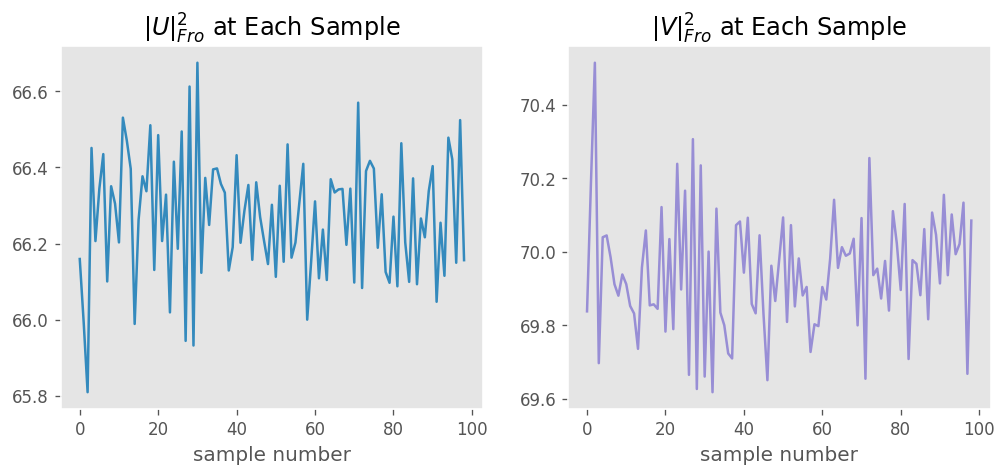

In [ ]:
pmf.traceplot()

–í–∏–¥–∏–º–æ, –Ω–æ—Ä–º–∞ —Å–æ—à–ª–∞—Å—å —É–∂–µ –ø–æ—Å–ª–µ –¥–µ—Ñ–æ–ª—Ç–Ω–æ–≥–æ —Ç—å—é–Ω–∏–Ω–≥–∞ (500 —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–π) - —ç—Ç–æ –ª–µ–≥—á–µ –≤–∏–¥–µ—Ç—å –Ω–∞ –∫–∞—Ä—Ç–∏–Ω–∫–µ –∏–∑ —Å—Ç–∞—Ç—å–∏ —Å 500 —Å—ç–º–ø–ª–∞–º–∏ –ø–æ—Å–ª–µ —Ç—å—é–Ω–∏–Ω–≥–∞.

–¢–µ–ø–µ—Ä—å –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ RMSE –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –Ω–æ–º–µ—Ä–∞ —à–∞–≥–∞ –∞–ª–≥–æ—Ä–∏—Ç–º–∞:

In [ ]:
# —Ç–µ–ø–µ—Ä—å –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –æ—à–∏–±–∫—É –Ω–∞ –∫–∞–∂–¥–æ–º –∫–∞–∂–¥–æ–π –≤—ã–±–æ—Ä–∫–µ –∏ –ø–æ –Ω–∞–∫–æ–ø–ª–µ–Ω–Ω–æ–º—É —Å—Ä–µ–¥–Ω–µ–º—É
def _running_rmse(pmf_model, test_data, train_data, burn_in=0, plot=True):
    """Calculate RMSE for each step of the trace to monitor convergence."""
    results = {'per-step-train' : [], 'running-train' : [],
               'per-step-test' : [], 'running-test' : []}
    R = np.zeros_like(test_data)

    for j, sample in enumerate(pmf_model.trace):
        sample_R = pmf_model.predict(sample['U'], sample['V'])
        R += sample_R
        # —É—Å—Ä–µ–¥–Ω–µ–Ω–Ω–∞—è –ø–æ –≤—Å–µ–º –ø—Ä–µ–¥—ã–¥—É—â–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è–º –æ—Ü–µ–Ω–∫–∞ R
        running_R = R / (j + 1)
        results['per-step-train'].append(rmse(train_data, sample_R))
        results['running-train'].append(rmse(train_data, running_R))
        results['per-step-test'].append(rmse(test_data, sample_R))
        results['running-test'].append(rmse(test_data, running_R))

    results = pd.DataFrame(results)

    if plot:
        results.plot(kind='line', grid=False, figsize=(15, 7),
                     title="Per-step and Running RMSE From Posterior Predictive")
    
    # –∏—Ç–æ–≥–æ–≤–∞—è –æ—Ü–µ–Ω–∫–∞ R –∏ –≤—Å–µ –ø—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
    return running_R, results


PMF.running_rmse = _running_rmse

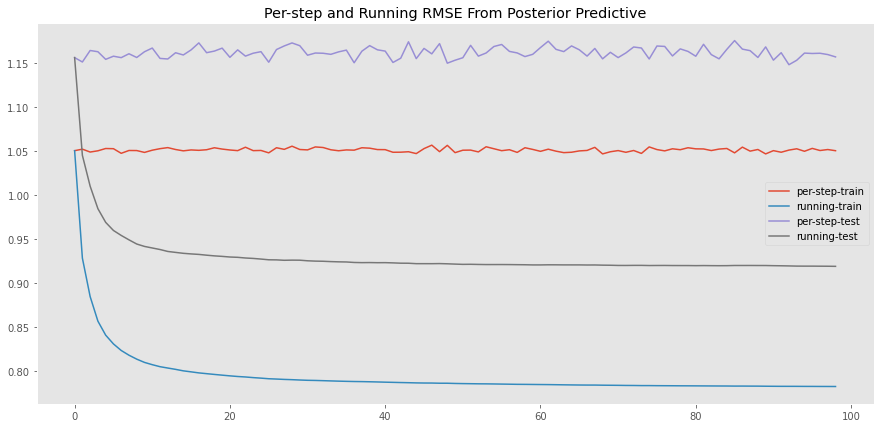

In [ ]:
predicted, results = pmf.running_rmse(test, train)

In [ ]:
# final rmse
final_test_rmse = results['running-test'].values[-1]
final_train_rmse = results['running-train'].values[-1]
print(f'Posterior predictive train RMSE: {final_train_rmse:.5f}')
print(f'Posterior predictive test RMSE: {final_test_rmse:.5f}')
print(f'Train/test difference: {final_test_rmse - final_train_rmse:.5f}')
print(f'Improvement from MAP: {pmf_map_rmse - final_test_rmse:.5f}')
print(f'Improvement from mean of means: {baselines["mom"] - final_test_rmse:.5f}')

Posterior predictive train RMSE: 0.78278
Posterior predictive test RMSE: 0.91901
Train/test difference: 0.13622
Improvement from MAP: 0.22759
Improvement from mean of means: 0.09193


## Summary of results

In [ ]:
all_results = {
    'global means' : baselines['gm'],
    'mean of means' : baselines['mom'],
    'uniform random' : baselines['ur'],
    'PMF MAP' : pmf_map_rmse,
    'PMF MCMC' : final_test_rmse
}

all_results = pd.Series(all_results).sort_values()

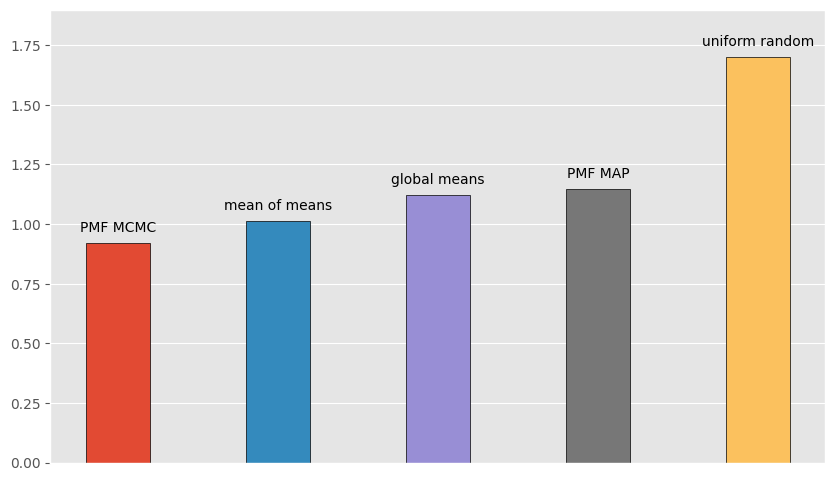

In [ ]:
plt.figure(dpi=100, figsize=[10, 6])

plt.bar(x=np.arange(5),
        height=all_results,
        width=0.4,
        color=['C' + str(j) for j in range(5)],
        ec='k')

for j in range(5):
    plt.text(j, all_results.iloc[j] + 0.05, all_results.index[j], ha='center')

plt.ylim(0, 1.9)
plt.xticks([]);

# Takeaway

–ú–æ–¥–µ–ª—å: 

 - –º–æ—è –ø–µ—Ä–≤–∞—è –º–æ–¥–µ–ª—å —Å–æ —Å–∫—Ä—ã—Ç—ã–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏ –∏ —Ä–∞–∑–ª–æ–∂–µ–Ω–∏–µ–º –º–∞—Ç—Ä–∏—Ü :)
 - —á–∏—Å–ª–æ —Å–∫—Ä—ã—Ç—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö - –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä
 - –Ω–æ—Ä–º–∞ –§—Ä–æ–±–µ–Ω–∏—É—Å–∞ - –æ–¥–∏–Ω –∏–∑ —Å–ø–æ—Å–æ–±–æ–≤ –º–æ–Ω–∏—Ç–æ—Ä–∏—Ç—å —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å –º–∞—Ä–∫–æ–≤—Å–∫–æ–π —Ü–µ–ø–∏ –¥–ª—è –º–∞—Ç—Ä–∏—Ü
 - –ø—Ä–µ–¥–ø–æ—Å–ª–µ–¥–Ω—è—è –∫–∞—Ä—Ç–∏–Ω–∫–∞ - —á—É–¥–æ –Ω–µ–∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π

–ö–æ–¥:
 - –ø–æ–ª—É—á–∏–ª–æ—Å—å —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å —Ü–µ–ª—ã–π –∫–ª–∞—Å—Å PMF —Å –±–æ–ª—å—à–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –º–µ—Ç–æ–¥–æ–≤ (—Å–º. –Ω–∏–∂–µ)
 - –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –º–µ—Ç–æ–¥—ã –≤—ã–∑—ã–≤–∞—é—Ç –¥—Ä—É–≥–∏–µ –≤–Ω—É—Ç—Ä–∏ —Å–µ–±—è –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è
 - –∫–æ—Å—Ç—ã–ª—å-–∫–ª–∞—Å—Å –¥–ª—è –æ—Å–æ–±–æ–π –∏—Ç–µ—Ä–∞—Ü–∏–∏ –ø–æ —Å–ª–æ–≤–∞—Ä—é
 - –ø–∏—Å–∞—Ç—å docstring - —ç—Ç–æ –ø–æ–ª–µ–∑–Ω–æ
 - –≤–ø–µ—Ä–≤—ã–µ –≤ –±–æ–µ–≤–æ–π –∑–∞–¥–∞—á–µ –ø—Ä–∏–º–µ–Ω–∏–ª pivot table –∏–∑ pandas
 - `dictionary.setdefault(key, value)` –¥–ª—è —Å–ª–æ–≤–∞—Ä–µ–π
 - `np.ma.masked_array`
 - –º–µ—Ç–æ–¥ `.plot()` –¥–ª—è `pd.Series` –∏ `pd.DataFrame` - —é–∑–∞–±–µ–ª—å–Ω–∞—è —à—Ç—É–∫–∞
 - logging (—Ö–æ—Ç—è –∏ –Ω–µ–ø–æ–Ω—è—Ç–Ω–æ, –ø–æ—á–µ–º—É –Ω–µ–ª—å–∑—è –ø—Ä–æ—Å—Ç–æ –ø–µ—á–∞—Ç–∞—Ç—å —Å–æ–æ–±—â–µ–Ω–∏—è)

In [ ]:
dir(PMF)[-8:]

['draw_samples',
 'eval_map',
 'find_map',
 'map',
 'norms',
 'predict',
 'running_rmse',
 'traceplot']